# Sistem Rekomendasi Film

Import library pandas untuk dapat membaca dataset

## Data Understanding

In [111]:
import pandas as pd

In [112]:
movies = pd.read_csv('/content/tmdb_5000_movies.csv')
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [113]:
print('Jumlah data film: ',len(movies.id.unique()))

Jumlah data film:  4803


In [114]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## Data Preparation

Karena pada kolom genres berbentuk JSOn, maka akan diubah ke bentuk string

In [115]:
def convert_from_json_to_ls(dic):
    ls= []
    for elem in dic:
        ls.append(elem['name'])
    return ls

def remove_white_space(lis):
    ls = []
    for sp in lis:
        ls.append(sp.replace(" ",""))
    return ls

In [116]:
import json
movies['genres'] = movies['genres'].apply(json.loads)
movies['genres']=movies['genres'].apply(convert_from_json_to_ls)
movies['genres'] = movies['genres'].apply(remove_white_space)

Membuat variabel movies_new yang menampung dataframe dengan kolom title, genres, dan popularity

In [118]:
movies_new = movies[['title','genres','popularity']]
movies_new

,title,genres,popularity
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",150.437577
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",139.082615
2,Spectre,"[Action, Adventure, Crime]",107.376788
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",112.312950
4,John Carter,"[Action, Adventure, ScienceFiction]",43.926995
...,...,...,...
4798,El Mariachi,"[Action, Crime, Thriller]",14.269792
4799,Newlyweds,"[Comedy, Romance]",0.642552
4800,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TVMovie]",1.444476
4801,Shanghai Calling,[],0.857008


Pada kolom Genres terdapat nilai kosong yang tidak terdeteksi walau menggunakan fungsi isna ataupun isnull karena bertipe list, jadi tipe list akan dibuah menjadi string

In [135]:
def listToString(s):
 
    # initialize an empty string
    str1 = ""
 
    # traverse in the string
    for ele in s:
        str1 += ele + " "
 
    # return string
    return str1

In [136]:
movies_new['genres'] = movies_new['genres'].apply(listToString)
movies_new

<ipython-input-136-6b042d888217>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_new['genres'] = movies_new['genres'].apply(listToString)


,title,genres,popularity
0,Avatar,Action Adventure Fantasy ScienceFiction,150.437577
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,139.082615
2,Spectre,Action Adventure Crime,107.376788
3,The Dark Knight Rises,Action Crime Drama Thriller,112.312950
4,John Carter,Action Adventure ScienceFiction,43.926995
...,...,...,...
4798,El Mariachi,Action Crime Thriller,14.269792
4799,Newlyweds,Comedy Romance,0.642552
4800,"Signed, Sealed, Delivered",Comedy Drama Romance TVMovie,1.444476
4801,Shanghai Calling,,0.857008


Mencari data film yang bernilai kosong pada kolom genres

In [139]:
empty_genre = movies_new[movies_new['genres'].str.strip().eq("")]
empty_genre

,title,genres,popularity
3971,Iguana,,0.214704
3992,Sardaarji,,0.296981
4068,Sharkskin,,0.027801
4105,"The Book of Mormon Movie, Volume 1: The Journey",,0.031947
4118,Hum To Mohabbat Karega,,0.001186
4293,The Algerian,,0.025364
4314,Crowsnest,,0.057564
4385,Lisa Picard Is Famous,,0.690089
4400,Sparkler,,0.547654
4413,Childless,,0.243853


Menghapus data film yang bergenre kosong

In [140]:
movies_final = movies_new.drop(empty_genre.index)
movies_final

,title,genres,popularity
0,Avatar,Action Adventure Fantasy ScienceFiction,150.437577
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,139.082615
2,Spectre,Action Adventure Crime,107.376788
3,The Dark Knight Rises,Action Crime Drama Thriller,112.312950
4,John Carter,Action Adventure ScienceFiction,43.926995
...,...,...,...
4797,Cavite,Foreign Thriller,0.022173
4798,El Mariachi,Action Crime Thriller,14.269792
4799,Newlyweds,Comedy Romance,0.642552
4800,"Signed, Sealed, Delivered",Comedy Drama Romance TVMovie,1.444476


Text(0.5, 1.0, 'Populer Movies')

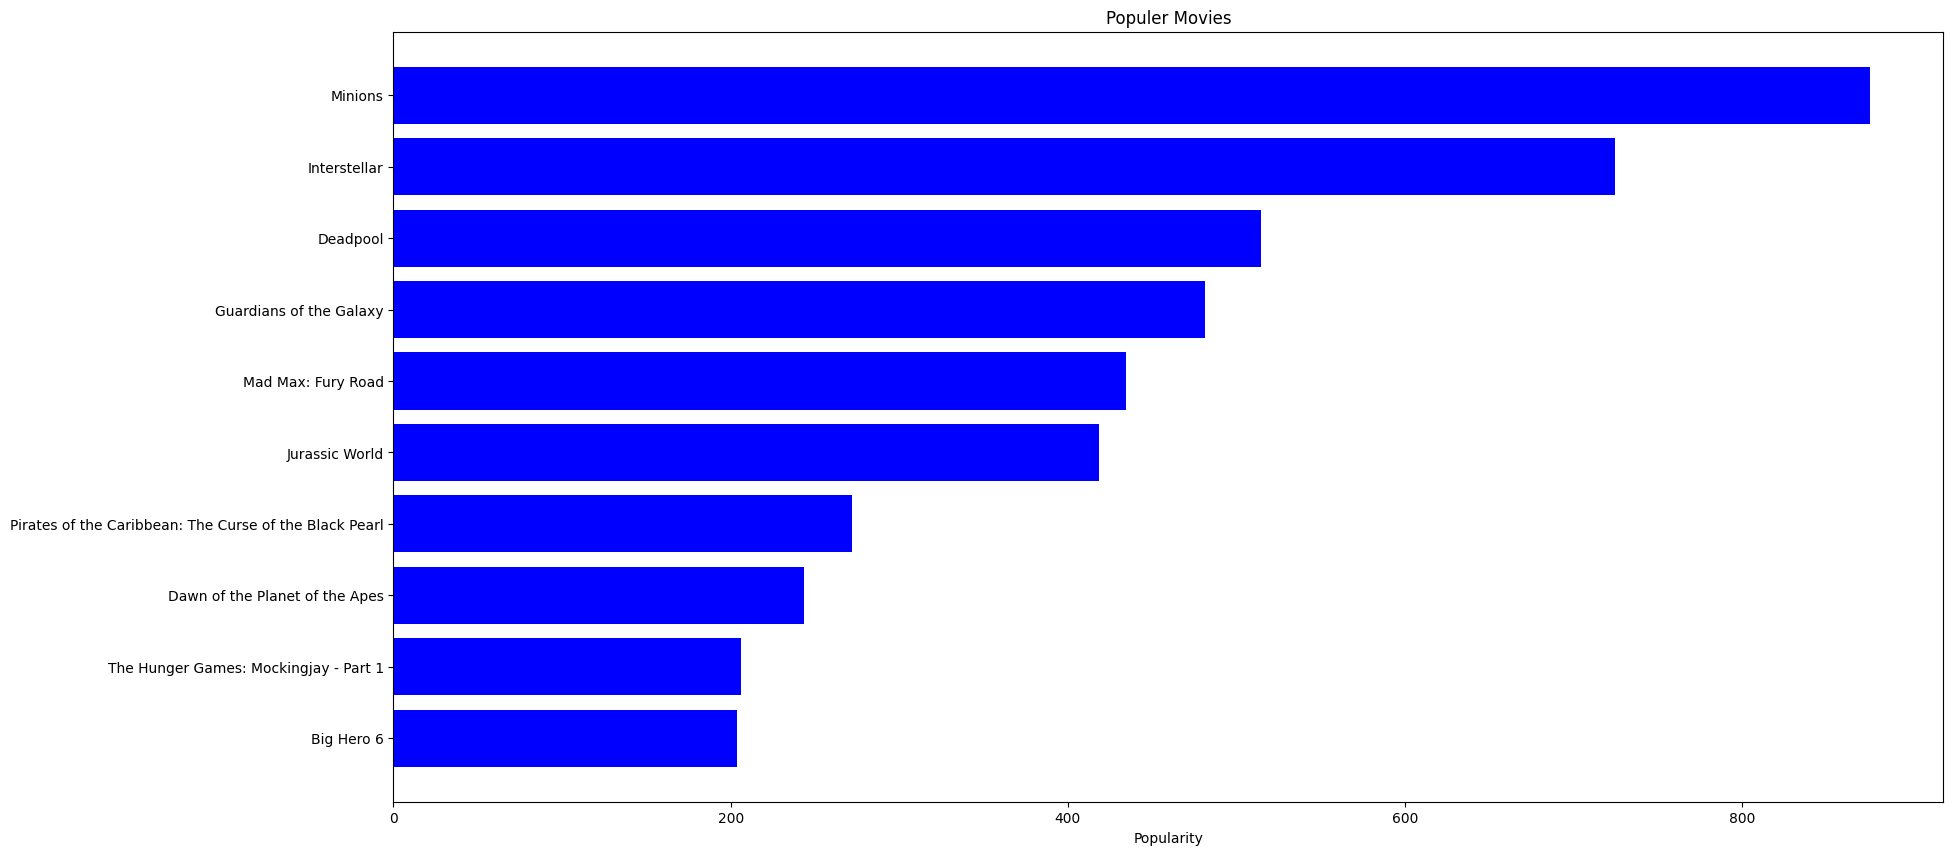

In [142]:
import matplotlib.pyplot as plt
Popularity = movies_final.sort_values('popularity',ascending=False)
plt.figure(figsize=(20,10))
plt.barh(Popularity['title'].head(10),Popularity['popularity'].head(10), align='center',
        color='blue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Populer Movies")

## Model Development

Menggunakan Tfidf Vectorizer untuk menemukan representasi fitur penting dari setiap kategori Genres

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer(lowercase=False)
 
# Melakukan perhitungan idf pada data genres
tf.fit(movies_final['genres']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out() 

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'ScienceFiction',
       'TVMovie', 'Thriller', 'War', 'Western'], dtype=object)

In [145]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(movies_final['genres']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(4775, 20)

Terdapat 20 genre yang berdeda, lalu akan diubah menjadi matriks

In [146]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.40589209, 0.46939833, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.48031601, 0.55546669, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.51309198, 0.59337082, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

## Membuat dataframe untuk melihat tf-idf matrix

## Membuat dataframe untuk melihat tf-idf matrix

In [152]:

# Kolom diisi dengan jenis genre
# Baris diisi dengan nama film
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=movies_final['title']
).sample(20, axis=1).sample(10, axis=0)

,Documentary,Horror,Mystery,War,Foreign,Crime,ScienceFiction,Romance,Adventure,History,Family,Music,Fantasy,Drama,Animation,Thriller,TVMovie,Western,Comedy,Action
title,,,,,,,,,,,,,,,,,,,,
Crying with Laughter,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.490501,0.000000,0.657373,0.0,0.000000,0.572075,0.000000
A Bug's Life,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.451363,0.0,0.520901,0.0,0.0,0.000000,0.647150,0.000000,0.0,0.000000,0.325777,0.000000
R100,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.650907,0.000000,0.000000,0.0,0.000000,0.759158,0.000000
She's the Man,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.538611,0.000000,0.0,0.650300,0.0,0.0,0.348711,0.000000,0.000000,0.0,0.000000,0.406705,0.000000
Dick,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
Hidalgo,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.484466,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.874810,0.000000,0.000000
Walking With Dinosaurs,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.477407,0.0,0.550957,0.0,0.0,0.000000,0.684491,0.000000,0.0,0.000000,0.000000,0.000000
Rango,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.349874,0.0,0.403777,0.0,0.0,0.000000,0.501639,0.000000,0.0,0.631776,0.252526,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.473436,0.000000,0.415629,0.0,0.000000,0.0,0.0,0.000000,0.595916,0.344715,0.0,0.000000,0.000000,0.359397


Setelah mengidentifikasi korelasi antara genre dan film. Selanjutkan menghitung derajat kesamaan dengan teknik cosine similarity

In [153]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.84505217, 0.48678725, ..., 0.        , 0.        ,
        0.        ],
       [0.84505217, 1.        , 0.57604402, ..., 0.        , 0.        ,
        0.        ],
       [0.48678725, 0.57604402, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.40899846,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.40899846, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [161]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama film
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies_final['title'], columns=movies_final['title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (4775, 4775)


title,Deep Rising,The Usual Suspects,Herbie Fully Loaded,Love Letters,The Impossible
title,,,,,
Our Brand Is Crisis,0.000000,0.273868,0.238915,0.389258,0.389258
Wordplay,0.000000,0.000000,0.000000,0.000000,0.000000
The Last Big Thing,0.000000,0.273868,0.238915,0.389258,0.389258
Star Trek,0.835011,0.000000,0.249866,0.000000,0.000000
Boogie Nights,0.000000,0.420748,0.000000,0.598025,0.598025
Friday,0.000000,0.000000,0.314710,0.000000,0.000000
The Legend of the Lone Ranger,0.343652,0.000000,0.342883,0.000000,0.000000
Dead Poets Society,0.000000,0.420748,0.000000,0.598025,0.598025
Time to Choose,0.000000,0.000000,0.000000,0.000000,0.000000


## Mendapatkan Rekomendasi

Mendapatkan rekomendasi dengan Top 5 dan diurutkan berdasarkan popularity

In [187]:
def film_recommendations(nama_film, similarity_data=cosine_sim_df, items=movies_final, k=5):

 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_film].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop title agar nama film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_film, errors='ignore')


    return pd.DataFrame(closest).merge(items).head(k).sort_values('popularity', ascending=False).reset_index(drop=True)

Melihat genre dari film Cavite

In [192]:
movies_final[movies_final.title.eq('Cavite')]

,title,genres,popularity
4797,Cavite,Foreign Thriller,0.022173


Mendapatkan rekomendasi film yang mirip dengan film Cavite

In [193]:
film_recommendations('Cavite')

,title,genres,popularity
0,The Circle,Drama Foreign,1.193779
1,Aberdeen,Drama Comedy Foreign,1.068819
2,The Holy Girl,Drama Foreign,0.684881
3,Pandaemonium,Drama Foreign,0.165367
4,The Other Conquest,Drama Foreign,0.015597


5 Film yang direkomendasikan dan sama-sama memiliki genre Drama Foreign. Pada tahap ini model sistem rekomendasi yang telah dibuat sudah dapat memberikan 5 rekomendasi film dengan benar